In [1]:
import lightgbm

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/Users/winten/Documents/datas/gas.csv',encoding='cp949')
df.head()

,연월일,시간,구분,공급량
0,2013-01-01,1,A,2497.129
1,2013-01-01,2,A,2363.265
2,2013-01-01,3,A,2258.505
3,2013-01-01,4,A,2243.969
4,2013-01-01,5,A,2344.105


In [4]:
df['구분'].unique()

array(['A', 'B', 'C', 'D', 'E', 'G', 'H'], dtype=object)

In [5]:
d_map = {}
for i, d in enumerate(df['구분'].unique()):
    d_map[d] = i
    
d_map

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'G': 5, 'H': 6}

In [6]:
df['구분'] = df['구분'].map(d_map)
df.head()

,연월일,시간,구분,공급량
0,2013-01-01,1,0,2497.129
1,2013-01-01,2,0,2363.265
2,2013-01-01,3,0,2258.505
3,2013-01-01,4,0,2243.969
4,2013-01-01,5,0,2344.105


In [7]:
df['연월일'] = pd.to_datetime(df['연월일'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368088 entries, 0 to 368087
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   연월일     368088 non-null  datetime64[ns]
 1   시간      368088 non-null  int64         
 2   구분      368088 non-null  int64         
 3   공급량     368088 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 11.2 MB


In [8]:
df['year'] = df['연월일'].dt.year
df['month'] = df['연월일'].dt.month
df['day'] = df['연월일'].dt.day
df['weekday'] = df['연월일'].dt.weekday

In [9]:
df.head()

,연월일,시간,구분,공급량,year,month,day,weekday
0,2013-01-01,1,0,2497.129,2013,1,1,1
1,2013-01-01,2,0,2363.265,2013,1,1,1
2,2013-01-01,3,0,2258.505,2013,1,1,1
3,2013-01-01,4,0,2243.969,2013,1,1,1
4,2013-01-01,5,0,2344.105,2013,1,1,1


In [10]:
df_=df.groupby(df['연월일']).mean()
df_

,시간,구분,공급량,year,month,day,weekday
연월일,,,,,,,
2013-01-01,12.5,3.0,1958.761619,2013.0,1.0,1.0,1.0
2013-01-02,12.5,3.0,2336.659952,2013.0,1.0,2.0,2.0
2013-01-03,12.5,3.0,2560.321333,2013.0,1.0,3.0,3.0
2013-01-04,12.5,3.0,2515.686048,2013.0,1.0,4.0,4.0
2013-01-05,12.5,3.0,2285.946429,2013.0,1.0,5.0,5.0
...,...,...,...,...,...,...,...
2018-12-27,12.5,3.0,2284.040345,2018.0,12.0,27.0,3.0
2018-12-28,12.5,3.0,2427.115863,2018.0,12.0,28.0,4.0
2018-12-29,12.5,3.0,2208.099351,2018.0,12.0,29.0,5.0


In [93]:
def supply_trends(df, start, end,figsize=(15,5)):
    plt.figure(figsize=figsize)
    plt.plot(df.index[start:end],df['공급량'][start:end],color='g')
    plt.title('Supply_trends')
    plt.hlines(np.max(df['공급량'][start:end]),df.index[start],df.index[end],colors='r')
    plt.hlines(np.min(df['공급량'][start:end]),df.index[start],df.index[end],colors='r')
    plt.hlines(np.mean(df['공급량'][start:end]),df.index[start],df.index[end],colors='black')
    plt.grid(True)
    plt.show()

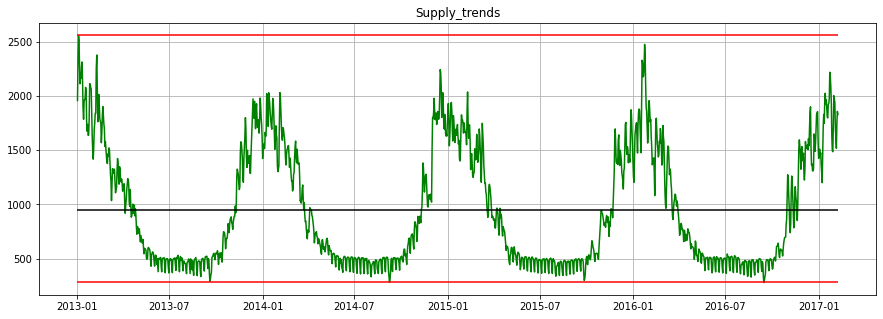

In [96]:
supply_trends(df_,start=0,end=1500)

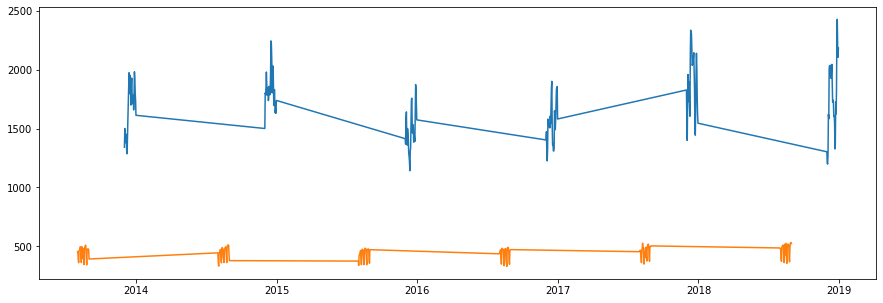

In [14]:
plt.figure(figsize=(15,5))
plt.plot(df_[df_.iloc[:,4]==12]['공급량']) # 12월 공급량
plt.plot(df_[df_.iloc[:,4]==8]['공급량']) # 8월 공급량
plt.show()

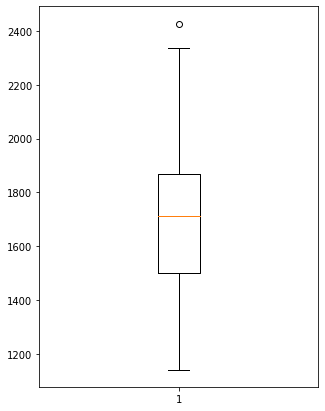

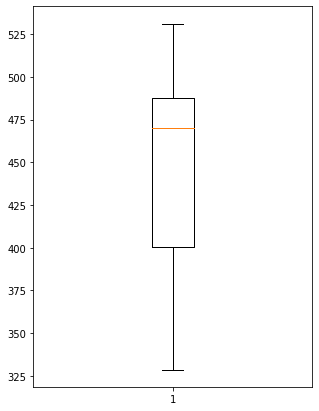

In [15]:
plt.figure(figsize=(5,7))
plt.boxplot(df_[df_.iloc[:,4]==12]['공급량']) # 12월 공급량
plt.figure(figsize=(5,7))
plt.boxplot(df_[df_.iloc[:,4]==8]['공급량']) # 8월 공급량
plt.show()

+ 가스 공급량은 뚜렷한 계절성을 띄는 것을 알 수 있다.
+ 여름에는 공급량이 낮았다가 겨울에는 급격하게 높아지는 특성이 있다.
+ 여름에는 400~500정도, 겨울에는 1500~1800정도 공급되고 있다.
+ 대략 여름보다 겨울의 공급량이 3배이상 많은 것을 알 수 있다.